In [1]:
from functions import *
import os
from tqdm import tqdm
datset_path = 'Dataset_30_sec'
list_of_periods = [2,3,4,5,6,7]

results = []

# Проходим по всем папкам внутри 'Dataset'
folders = os.listdir(datset_path)
for dir in folders:
    folder_path = os.path.join(datset_path, dir)
    for root, dirs, files in os.walk(folder_path):
            print(root)
            n = 0
            for file_name in tqdm(files):
                file_path = os.path.join(root, file_name)
                res_ill = 0
                res_good = 0
                error = 0
                conf_ill = 0 # значение конфиденсов диагноза болен
                n += 1
                
                for i in list_of_periods:
                    input_data = {}
                    input_data["data_edf"] =  file_path
                    input_data["n_term_start"] = i
                    input_data["n_term_finish"] = None
                    input_data["filt"] = True
                    input_data["f_sreza"] = 0.7
                    input_data["f_sampling"] = 2000
                    input_data["show_ecg"] = False
                    input_data["plot_3d"] = False
                    input_data["qrs_loop_area"] = False
                    input_data["t_loop_area"] = False
                    input_data["count_qrst_angle"] = False
                    input_data["mean_filter"] = False
                    input_data["predict"] = True
                    input_data["plot_projections"] = False
                    input_data["logs"] = False
                    input_data["save_coord"] = False
                    input_data["pr_delta"] = 0.5
                    input_data["show_xyz"] = False
                    # Запустим главную функцию получения ВЭКГ и СППР
                    result_dict = get_VECG(input_data)
                    res = result_dict['text']
                    #print(res[3])

                    if len(res)==4:
                        if res[3].split(' ')[0] == "Болен":
                            res_ill += 1
                            conf_ill += float(res[3].split(' ')[-1][:-4])
                        else:
                            res_good += 1
                            conf_ill += 100 - float(res[3].split(' ')[-1][:-4])
                    else:
                        error += 1
                if res_ill > res_good:
                    result = "Болен"
                    percent = res_ill * 100 /(res_ill+res_good)
                    conf = conf_ill/(res_ill+res_good)
                else:
                    result = "Здоров"
                    percent = res_good * 100/(res_ill+res_good)
                    conf = 100 - conf_ill/(res_ill+res_good)
                if error == len(list_of_periods):
                    print(f'Не обработался файл{file_name}')
                    results.append({'Файл': file_name, 'Итоговый Результат': 'Ошибка обработки', 'Всего предсказаний': 0,
                                    'Процент соответствующих пердсказаний': '-', 'Средняя уверенность классификатора': '-',
                                    'Confidence ill': '-' })
                else:
                    results.append({'Файл': file_name, 'Итоговый Результат': result, 'Всего предсказаний': res_ill+res_good,
                                    'Процент соответствующих пердсказаний': str(round(percent))+'%',
                                    'Средняя уверенность классификатора': str(round(conf,2))+'%',
                                    'Confidence ill': str(round(conf_ill/(res_ill+res_good),2))+'%'})
                    
# Создаем DataFrame из списка результатов
df = pd.DataFrame(results)

# Записываем данные в Excel
#excel_file = 'last_10_sec_results/last_10_sec_results_new_model_05_delta_подробно.xlsx'
excel_file = 'first_10_sec_results/first_10_sec_results_new_model_05_delta_подробно.xlsx'
df.to_excel(excel_file, index=False)
print(f"Результаты сохранены в {excel_file}")               


Dataset_30_sec\TG1


 47%|████▋     | 468/1000 [08:55<07:56,  1.12it/s]

На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:
На I отведении не удалось детектировать R зубцы
Проводим детектирование по II отведению:


100%|██████████| 1000/1000 [16:42<00:00,  1.00s/it]


Dataset_30_sec\TG10


100%|██████████| 1000/1000 [15:02<00:00,  1.11it/s]


Dataset_30_sec\TG11


100%|██████████| 795/795 [12:33<00:00,  1.06it/s]


Dataset_30_sec\TG2


100%|██████████| 1001/1001 [15:36<00:00,  1.07it/s]


Dataset_30_sec\TG3


100%|██████████| 1000/1000 [17:13<00:00,  1.03s/it]


Dataset_30_sec\TG4


100%|██████████| 1000/1000 [15:46<00:00,  1.06it/s]


Dataset_30_sec\TG5


100%|██████████| 1000/1000 [15:55<00:00,  1.05it/s]


Dataset_30_sec\TG6


 82%|████████▏ | 823/1000 [14:54<03:23,  1.15s/it]

In [2]:
from functions import *
import os
from tqdm import tqdm
datset_path = 'Dataset'
list_of_periods = [2,3,4,5,6,7]

results = []

# Проходим по всем папкам внутри 'Dataset'
folders = os.listdir(datset_path)
for dir in folders:
    folder_path = os.path.join(datset_path, dir)
    for root, dirs, files in os.walk(folder_path):
            print(root)
            n = 0
            for file_name in tqdm(files):
                file_path = os.path.join(root, file_name)
                res_ill = 0
                res_good = 0
                error = 0
                conf_ill = 0 # значение конфиденсов диагноза болен
                n += 1
                
                for i in list_of_periods:
                    input_data = {}
                    input_data["data_edf"] =  file_path
                    input_data["n_term_start"] = i
                    input_data["n_term_finish"] = None
                    input_data["filt"] = True
                    input_data["f_sreza"] = 0.7
                    input_data["f_sampling"] = 2000
                    input_data["show_ecg"] = False
                    input_data["plot_3d"] = False
                    input_data["qrs_loop_area"] = False
                    input_data["t_loop_area"] = False
                    input_data["count_qrst_angle"] = False
                    input_data["mean_filter"] = False
                    input_data["predict"] = True
                    input_data["plot_projections"] = False
                    input_data["logs"] = False
                    # Запустим главную функцию получения ВЭКГ и СППР
                    res = get_VECG(input_data)

                    if len(res)==4:
                        if res[3].split(' ')[0] == "Болен":
                            res_ill += 1
                            conf_ill += float(res[3].split(' ')[-1][:-2])
                        else:
                            res_good += 1
                            conf_ill += 100 - float(res[3].split(' ')[-1][:-2])
                    else:
                        error += 1
                if res_ill > res_good:
                    result = "Болен"
                    percent = res_ill * 100 /(res_ill+res_good)
                    conf = conf_ill/(res_ill+res_good)
                else:
                    result = "Здоров"
                    percent = res_good * 100/(res_ill+res_good)
                    conf = 100 - conf_ill/(res_ill+res_good)
                if error == len(list_of_periods):
                    print(f'Не обработался файл{file_name}')
                    results.append({'Файл': file_name, 'Всего предсказаний': res_ill+res_good,
                                    'Уверенность в диагнозе БОЛЕН': '-','Уверенность в диагнозе ЗДОРОВ': '-' })
                else:
                    c_ill = round(conf_ill/(res_ill+res_good),2)
                    c_good = round(100-c_ill, 2)
                    results.append({'Файл': file_name, 'Всего предсказаний': res_ill+res_good,
                                    'Уверенность в диагнозе БОЛЕН': str(c_ill)+'%','Уверенность в диагнозе ЗДОРОВ': str(c_good)+'%' })
                    
# Создаем DataFrame из списка результатов
df = pd.DataFrame(results)

# Записываем данные в Excel
excel_file = 'first_10_sec_results/уверенности.xlsx'
df.to_excel(excel_file, index=False)
print(f"Результаты сохранены в {excel_file}")          

In [3]:
import pandas as pd

# Указываем путь к файлу Excel
file_path = 'last_10_sec_results/last_10_sec_results_подробно.xlsx'

# Загружаем данные из файла Excel в объект DataFrame
df = pd.read_excel(file_path)

# Предположим, у вас есть столбец 'статус' (или любой другой), который указывает на состояние пациента
# Подсчитываем количество здоровых и больных пациентов
healthy_count = df[df['Итоговый Результат'] == 'Здоров'].shape[0]
sick_count = df[df['Итоговый Результат'] == 'Болен'].shape[0]

# Выводим информацию о пропорции здоровых и больных пациентов
print(f"Количество здоровых пациентов: {healthy_count}")
print(f"Количество больных пациентов: {sick_count}")


Количество здоровых пациентов: 6280
Количество больных пациентов: 4516


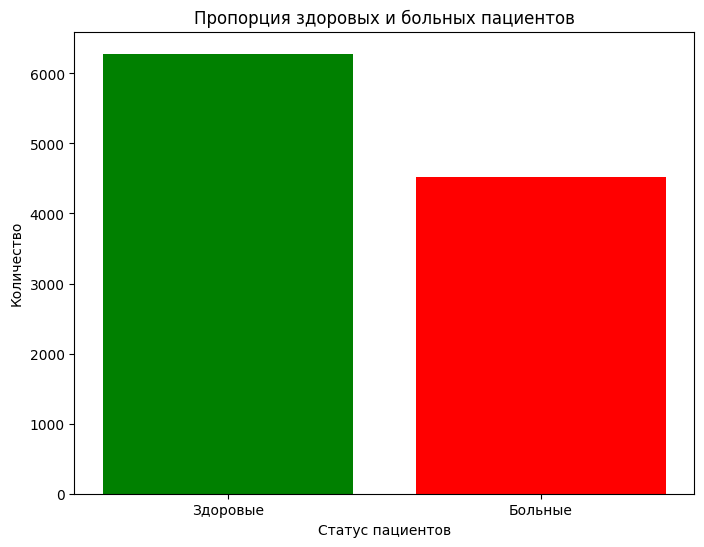

In [4]:
import matplotlib.pyplot as plt

# Создаем список для количества здоровых и больных пациентов
counts = [healthy_count, sick_count]
labels = ['Здоровые', 'Больные']

# Создаем барплот
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Статус пациентов')
plt.ylabel('Количество')
plt.title('Пропорция здоровых и больных пациентов')

# Отображаем график
plt.show()